## Observations and Insights 

In [1]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import numpy as np 
import pandas as pd
import scipy.stats as st

# Study data files
mouse_metadata_path = "data/Mouse_metadata.csv"
study_results_path = "data/Study_results.csv"

# Read the mouse data and the study results
mouse_metadata = pd.read_csv(mouse_metadata_path)
study_results = pd.read_csv(study_results_path)

# Combine the data into a single dataset
combined_data_df = pd.merge(mouse_metadata, study_results, on='Mouse ID', how='outer' )

# Display the data table for preview
combined_data_df.head()

,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites
0,k403,Ramicane,Male,21,16,0,45.000000,0
1,k403,Ramicane,Male,21,16,5,38.825898,0
2,k403,Ramicane,Male,21,16,10,35.014271,1
3,k403,Ramicane,Male,21,16,15,34.223992,1
4,k403,Ramicane,Male,21,16,20,32.997729,1


In [2]:
# Checking the number of mice.
len(combined_data_df['Mouse ID'].unique())

249

In [3]:
# Getting the duplicate mice by ID number that shows up for Mouse ID and Timepoint. 
duplicate_mice_mask = combined_data_df['Mouse ID'].duplicated()
duplicate_mice = combined_data_df[duplicate_mice_mask]
duplicate_mice

,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites
1,k403,Ramicane,Male,21,16,5,38.825898,0
2,k403,Ramicane,Male,21,16,10,35.014271,1
3,k403,Ramicane,Male,21,16,15,34.223992,1
4,k403,Ramicane,Male,21,16,20,32.997729,1
5,k403,Ramicane,Male,21,16,25,33.464577,1
...,...,...,...,...,...,...,...,...
1888,z969,Naftisol,Male,9,30,25,63.145652,2
1889,z969,Naftisol,Male,9,30,30,65.841013,3
1890,z969,Naftisol,Male,9,30,35,69.176246,4
1891,z969,Naftisol,Male,9,30,40,70.314904,4


In [4]:
# Optional: Get all the data for the duplicate mouse ID. 



In [5]:
# Create a clean DataFrame by dropping the duplicate mouse by its ID.
not_clean = combined_data_df

####
combined_data_df = combined_data_df.drop_duplicates(subset=['Mouse ID'])
combined_data_df.head()

print(len(combined_data_df), len(not_clean))

249 1893


In [6]:
# Checking the number of mice in the clean DataFrame.
len(combined_data_df['Mouse ID'].unique())

249

## Summary Statistics

In [7]:
# Generate a summary statistics table of mean, median, variance, standard deviation, and SEM of the tumor volume for each regimen

# Use groupby and summary statistical methods to calculate the following properties of each drug regimen: 
# mean, median, variance, standard deviation, and SEM of the tumor volume. 
# Assemble the resulting series into a single summary dataframe.

# drug_grouping = combined_data_df.groupby('Drug Regimen')
drug_grouping = not_clean.groupby('Drug Regimen')

vol_mean = drug_grouping.mean()['Tumor Volume (mm3)']
vol_std = drug_grouping.std()['Tumor Volume (mm3)']
vol_variance = drug_grouping.var()['Tumor Volume (mm3)']
vol_median = drug_grouping.median()['Tumor Volume (mm3)']
vol_sem = drug_grouping.sem()['Tumor Volume (mm3)']

In [8]:
# Generate a summary statistics table of mean, median, variance, standard deviation, and SEM of the tumor volume for each regimen

regimen_summary_df = pd.merge(vol_mean, vol_median, on='Drug Regimen')
regimen_summary_df = regimen_summary_df.rename(columns={'Tumor Volume (mm3)_x': 'mean', 'Tumor Volume (mm3)_y': 'median'})
regimen_summary_df = pd.merge(regimen_summary_df, vol_variance, on='Drug Regimen')
regimen_summary_df = regimen_summary_df.rename(columns={'Tumor Volume (mm3)': 'variance'})
regimen_summary_df = pd.merge(regimen_summary_df, vol_std, on='Drug Regimen')
regimen_summary_df = regimen_summary_df.rename(columns={'Tumor Volume (mm3)': 'std'})
regimen_summary_df = pd.merge(regimen_summary_df, vol_sem, on='Drug Regimen')
regimen_summary_df = regimen_summary_df.rename(columns={'Tumor Volume (mm3)': 'sem'})

regimen_summary_df

# Using the aggregation method, produce the same summary statistics in a single line
regimen_summary_df = drug_grouping.agg({'Tumor Volume (mm3)':['mean', 'median', 'var', 'std', 'sem']})

regimen_summary_df

# combined_data_df

Tumor Volume (mm3)                                          
                           mean     median        var       std       sem
Drug Regimen                                                             
Capomulin             40.675741  41.557809  24.947764  4.994774  0.329346
Ceftamin              52.591172  51.776157  39.290177  6.268188  0.469821
Infubinol             52.884795  51.820584  43.128684  6.567243  0.492236
Ketapril              55.235638  53.698743  68.553577  8.279709  0.603860
Naftisol              54.331565  52.509285  66.173479  8.134708  0.596466
Placebo               54.033581  52.288934  61.168083  7.821003  0.581331
Propriva              52.322552  50.854632  42.351070  6.507770  0.512884
Ramicane              40.216745  40.673236  23.486704  4.846308  0.320955
Stelasyn              54.233149  52.431737  59.450562  7.710419  0.573111
Zoniferol             53.236507  51.818479  48.533355  6.966589  0.516398

# Bar and Pie Charts

Capomulin    230
Ramicane     228
Ketapril     188
Naftisol     186
Zoniferol    182
Placebo      181
Stelasyn     181
Ceftamin     178
Infubinol    178
Propriva     161
Name: Drug Regimen, dtype: int64

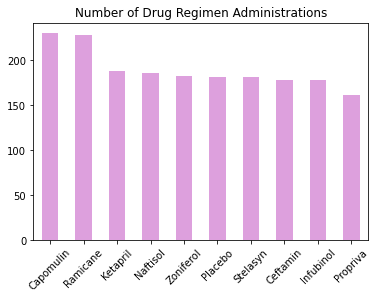

In [9]:
# Generate a bar plot showing the total number of measurements taken on each drug regimen using pandas.
num_instances = not_clean['Drug Regimen'].value_counts()

num_instances.plot.bar(color='plum',rot=45, title='Number of Drug Regimen Administrations')
num_instances

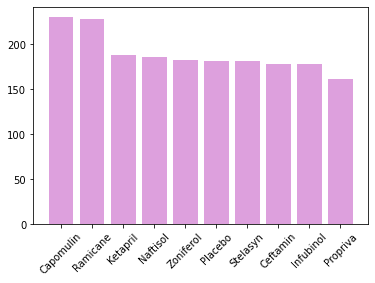

In [10]:
# Generate a bar plot showing the total number of measurements taken on each drug regimen using pyplot.
num_drugs = np.arange(len(num_instances))
plt.bar(num_drugs, num_instances, color='plum', align='center')
plt.xticks(num_drugs, num_instances.index, rotation=45)
plt.show()

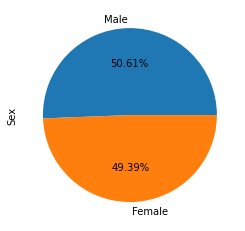

In [11]:
# Generate a pie plot showing the distribution of female versus male mice using pandas
distrib_sex = not_clean['Sex'].value_counts()
distrib_sex.plot(kind='pie', autopct='%1.2f%%')

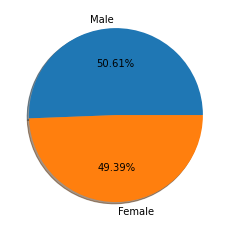

In [12]:
# Generate a pie plot showing the distribution of female versus male mice using pyplot
plt.pie(distrib_sex, labels=distrib_sex.index, autopct='%1.2f%%', shadow=True)
plt.show()

## Quartiles, Outliers and Boxplots

In [16]:
# Calculate the final tumor volume of each mouse across four of the treatment regimens:  
# Capomulin, Ramicane, Infubinol, and Ceftamin

# Start by getting the last (greatest) timepoint for each mouse

mice_ids = not_clean['Mouse ID'].unique()
last_timepoint = []

for mouse in mice_ids:
    mouse_data = not_clean[not_clean['Mouse ID'] == mouse]
    max_timepoint = mouse_data['Timepoint'].max()
    last_timepoint.append(max_timepoint)
    
final = {'Mouse ID': mice_ids,
         'Timepoint': last_timepoint}

final_tps = pd.DataFrame(final)
    
# Merge this group df with the original dataframe to get the tumor volume at the last timepoint
# get subset of specifics drugs 

final_timepoint_df = pd.merge(not_clean, final_tps, on=['Mouse ID','Timepoint'])

final_timepoint_df = final_timepoint_df[final_timepoint_df['Drug Regimen'] != 'Placebo']
final_timepoint_df = final_timepoint_df[final_timepoint_df['Drug Regimen'] != 'Stelasyn']
final_timepoint_df = final_timepoint_df[final_timepoint_df['Drug Regimen'] != 'Zoniferol']
final_timepoint_df = final_timepoint_df[final_timepoint_df['Drug Regimen'] != 'Ketapril']
final_timepoint_df = final_timepoint_df[final_timepoint_df['Drug Regimen'] != 'Propriva']
final_timepoint_df = final_timepoint_df[final_timepoint_df['Drug Regimen'] != 'Naftisol']

final_timepoint_df.head()

,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites
0,k403,Ramicane,Male,21,16,45,22.050126,1
1,s185,Capomulin,Female,3,17,45,23.343598,1
2,x401,Capomulin,Female,16,15,45,28.484033,0
3,m601,Capomulin,Male,22,17,45,28.430964,1
4,g791,Ramicane,Male,11,16,45,29.128472,1


In [32]:
# Put treatments into a list for for loop (and later for plot labels)
treatments = set(final_timepoint_df['Drug Regimen'])

# Create empty list to fill with tumor vol data (for plotting)
tumor_vol = {}

# Calculate the IQR and quantitatively determine if there are any potential outliers. 

    
    # Locate the rows which contain mice on each drug and get the tumor volumes
for drug in treatments:
    vol = final_timepoint_df.loc[final_timepoint_df['Drug Regimen'] == drug]
    tumor_vol[drug] = vol['Tumor Volume (mm3)']

    
    # add subset 
    
    
    # Determine outliers using upper and lower bounds

tumor_vol

{'Ceftamin': 52     62.999356
 65     45.000000
 66     56.057749
 68     55.742829
 97     48.722078
 111    47.784682
 118    61.849023
 122    68.923185
 133    67.748662
 134    57.918381
 135    46.784535
 136    59.851956
 139    64.299830
 155    59.741901
 171    61.433892
 175    64.192341
 195    45.000000
 199    52.925348
 200    45.000000
 216    67.527482
 228    45.000000
 232    64.634949
 235    61.386660
 241    68.594745
 242    64.729837
 Name: Tumor Volume (mm3), dtype: float64,
 'Ramicane': 0     22.050126
 4     29.128472
 5     30.276232
 7     30.564625
 8     30.638696
 9     31.560470
 11    31.095335
 15    33.397653
 17    32.978522
 18    33.562402
 19    36.134852
 21    38.810366
 23    37.225650
 25    36.374510
 26    36.561652
 27    37.311236
 29    38.342008
 33    38.407618
 41    40.659006
 42    40.667713
 43    45.220869
 44    43.047543
 46    43.419381
 47    43.166373
 48    44.183451
 Name: Tumor Volume (mm3), dtype: float64,
 'Infubinol': 4

In [ ]:
# Generate a box plot of the final tumor volume of each mouse across four regimens of interest


## Line and Scatter Plots

In [ ]:
# Generate a line plot of tumor volume vs. time point for a mouse treated with Capomulin


In [ ]:
# Generate a scatter plot of average tumor volume vs. mouse weight for the Capomulin regimen


## Correlation and Regression

In [ ]:
# Calculate the correlation coefficient and linear regression model 
# for mouse weight and average tumor volume for the Capomulin regimen
